# Importing Libraries


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from random import randint

# Data Loading

In [2]:
!unzip /content/drive/MyDrive/ImageClassificationModel/intel_img.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

# Data Preprocessing

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_loader = img_gen.flow_from_directory(
    directory = "seg_train/seg_train", target_size = (128, 128), batch_size = 50, seed = 42
)

test_loader = img_gen.flow_from_directory(
    directory = "seg_test/seg_test", target_size = (128, 128), batch_size = 50, seed = 42
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [5]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [6]:
idx_to_classes = {val:key for key, val in dict(train_loader.class_indices).items()}
idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

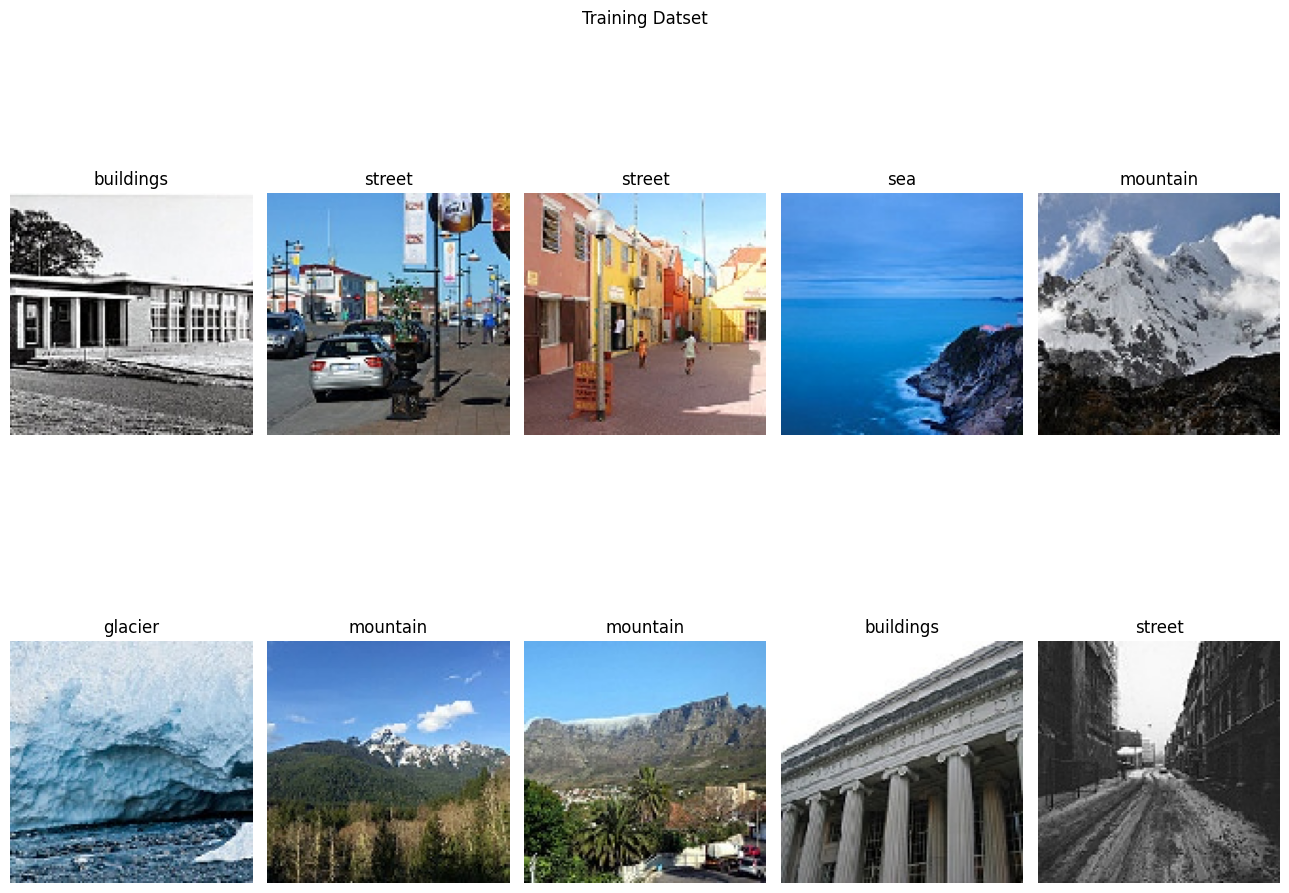

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(13, 11))
idx = 0

for i in range(2):
    for j in range(5):
        label= idx_to_classes[np.argmax(train_loader[0][1][idx])]
        ax[i, j].set_title(f'{label}')
        ax[i, j].imshow(train_loader[0][0][idx][:, :, :])
        ax[i, j].axis('off')
        idx += 1

plt.tight_layout()
plt.suptitle('Training Datset')
plt.show()

# CNN Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()
# Convolution Layer 1
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = (128, 128, 3)))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolution Layer 2
model.add(Conv2D(64, kernel_size=(3,3), activation = "relu"))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten & Linear Fully Connected Layers
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(6, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 42, 42, 32)        0         
 Pooling2D)                                                      
                                                                 
 batch_normalization (Batch  (None, 42, 42, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 42, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 13, 13, 64)        0

In [11]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [12]:
train_steps = len(train_loader)
test_steps = len(test_loader)

In [14]:
train_metrics = model.fit_generator(
    generator = train_loader,
    steps_per_epoch = train_steps,
    epochs = 25,
    validation_data = test_loader,
    validation_steps = test_steps
)

Epoch 1/25


<ipython-input-14-c3e57a960265>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_metrics = model.fit_generator(


281/281 [==============================] - 31s 66ms/step - loss: 1.4682 - accuracy: 0.5250 - val_loss: 2.4955 - val_accuracy: 0.2320
Epoch 2/25
281/281 [==============================] - 18s 65ms/step - loss: 1.0141 - accuracy: 0.6315 - val_loss: 1.7211 - val_accuracy: 0.5117
Epoch 3/25
281/281 [==============================] - 19s 69ms/step - loss: 0.8297 - accuracy: 0.6941 - val_loss: 1.1277 - val_accuracy: 0.5790
Epoch 4/25
281/281 [==============================] - 19s 67ms/step - loss: 0.7329 - accuracy: 0.7329 - val_loss: 0.7187 - val_accuracy: 0.7343
Epoch 5/25
281/281 [==============================] - 18s 64ms/step - loss: 0.6545 - accuracy: 0.7558 - val_loss: 1.3116 - val_accuracy: 0.6627
Epoch 6/25
281/281 [==============================] - 21s 75ms/step - loss: 0.6147 - accuracy: 0.7738 - val_loss: 0.5902 - val_accuracy: 0.8030
Epoch 7/25
281/281 [==============================] - 18s 64ms/step - loss: 0.5550 - accuracy: 0.7936 - val_loss: 0.6269 - val_accuracy: 0.7867
Epo

Model Performance

In [15]:
history_df = pd.DataFrame(train_metrics.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.468217,0.525011,2.495466,0.232000
1,1.014116,0.631538,1.721093,0.511667
2,0.829691,0.694100,1.127652,0.579000
3,0.732926,0.732863,0.718709,0.734333
4,0.654468,0.755807,1.311561,0.662667
5,0.614656,0.773764,0.590213,0.803000
6,0.555023,0.793644,0.626943,0.786667
7,0.516278,0.802408,0.769456,0.744333
8,0.498626,0.809961,0.690926,0.777000
9,0.466285,0.824498,0.868256,0.771667


In [16]:
train_loss = history_df["loss"]
train_accuracy = history_df["accuracy"]
test_loss = history_df["val_loss"]
test_accuracy = history_df["val_accuracy"]

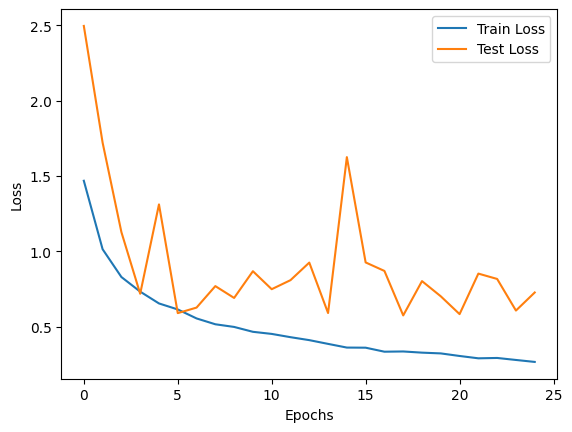

In [17]:
plt.plot(range(25), train_loss, label = "Train Loss")
plt.plot(range(25), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

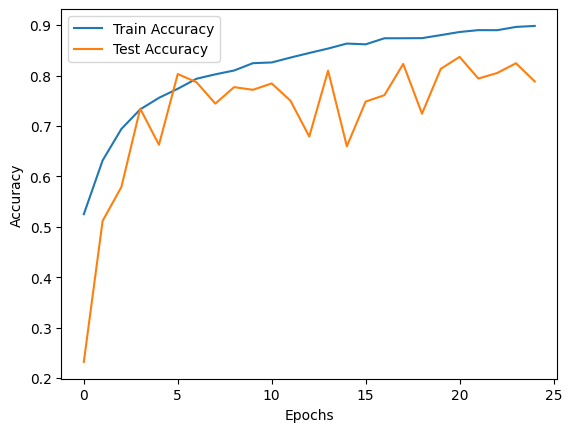

In [18]:
plt.plot(range(25), train_accuracy, label = "Train Accuracy")
plt.plot(range(25), test_accuracy, label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Making Prediction from the Model

In [19]:
pred_list = [f"seg_pred/seg_pred/{i}" for i in os.listdir("seg_pred/seg_pred")]
pred_list

['seg_pred/seg_pred/6423.jpg',
 'seg_pred/seg_pred/19631.jpg',
 'seg_pred/seg_pred/15738.jpg',
 'seg_pred/seg_pred/21728.jpg',
 'seg_pred/seg_pred/7219.jpg',
 'seg_pred/seg_pred/21515.jpg',
 'seg_pred/seg_pred/13662.jpg',
 'seg_pred/seg_pred/13628.jpg',
 'seg_pred/seg_pred/1264.jpg',
 'seg_pred/seg_pred/19744.jpg',
 'seg_pred/seg_pred/24183.jpg',
 'seg_pred/seg_pred/16883.jpg',
 'seg_pred/seg_pred/3595.jpg',
 'seg_pred/seg_pred/12132.jpg',
 'seg_pred/seg_pred/15891.jpg',
 'seg_pred/seg_pred/24002.jpg',
 'seg_pred/seg_pred/22352.jpg',
 'seg_pred/seg_pred/3248.jpg',
 'seg_pred/seg_pred/20758.jpg',
 'seg_pred/seg_pred/19372.jpg',
 'seg_pred/seg_pred/23064.jpg',
 'seg_pred/seg_pred/38.jpg',
 'seg_pred/seg_pred/15836.jpg',
 'seg_pred/seg_pred/2684.jpg',
 'seg_pred/seg_pred/8506.jpg',
 'seg_pred/seg_pred/2780.jpg',
 'seg_pred/seg_pred/20201.jpg',
 'seg_pred/seg_pred/16323.jpg',
 'seg_pred/seg_pred/5151.jpg',
 'seg_pred/seg_pred/1409.jpg',
 'seg_pred/seg_pred/7862.jpg',
 'seg_pred/seg_pred/20

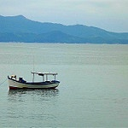

Model Prediction:  sea


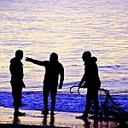

Model Prediction:  sea


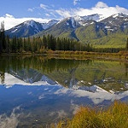

Model Prediction:  mountain


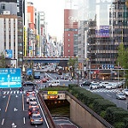

Model Prediction:  street


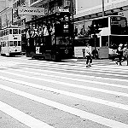

Model Prediction:  glacier


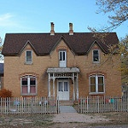

Model Prediction:  buildings


In [21]:
for i in range(6):
  num = randint(0, len(pred_list))
  img = Image.open(pred_list[num])
  img = img.resize((128, 128))
  display(img)
  img_arr = np.array(img)
  img_arr = img_arr[np.newaxis, :]
  img_arr = img_arr.astype("float")
  img_arr = img_gen.standardize(img_arr)
  probability = model(img_arr)
  pred = np.argmax(probability)
  print("Model Prediction: ",idx_to_classes[pred])
  print("==========================================")

# SVM Model

Data Preprocessing

In [22]:
import cv2
X = []
Y = []
for cls in (train_loader.class_indices):
    pth = '/content/seg_train/seg_train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (128,128))
        X.append(img)
        Y.append(train_loader.class_indices[cls])

In [23]:
X = np.array(X)
Y = np.array(Y)

In [24]:
X

array([[[149,  53,  53, ..., 110, 110, 110],
        [172,  80,  63, ..., 114, 113, 113],
        [ 96,  90,  75, ..., 115, 115, 115],
        ...,
        [117, 121, 124, ..., 140,  68,  54],
        [118, 116, 128, ..., 151,  84,  74],
        [132, 126, 131, ..., 138,  57,  86]],

       [[ 11,  12,  13, ...,  11,  14,  17],
        [ 13,  12,  14, ...,  10,  12,  14],
        [ 12,  18,  23, ...,  12,  12,  12],
        ...,
        [ 12,   8,  12, ...,   9,   7,   8],
        [ 15,  11,  10, ...,  10,   9,   9],
        [  7,  16,  12, ...,  14,  14,  16]],

       [[206, 199, 204, ..., 188, 188, 189],
        [202, 204, 205, ..., 188, 188, 189],
        [203, 207, 211, ..., 188, 189, 189],
        ...,
        [  1,   9,  10, ...,  29,   9,  14],
        [  0,   4,   6, ...,  12,   6,   6],
        [  6,   3,   7, ...,  75,  77,  86]],

       ...,

       [[ 51,  46,  64, ..., 190, 204, 168],
        [ 57,  52,  47, ..., 182, 186, 175],
        [ 58,  58,  56, ..., 178, 179, 185

In [25]:
np.unique(Y)
Y

array([0, 0, 0, ..., 5, 5, 5])

In [26]:
pd.Series(Y).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
dtype: int64

In [27]:
X.shape,Y.shape

((14034, 128, 128), (14034,))

In [28]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(14034, 16384)

Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=0,test_size=0.2)

In [32]:
xtrain.shape, xtest.shape

((11227, 16384), (2807, 16384))

Feature Scaling

In [33]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


SVM Model

In [35]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',random_state=None)

In [36]:
svm.fit(xtrain, ytrain)

SVC()

In [37]:
ypred = svm.predict(xtest)

Model Performance

In [65]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48       421
           1       0.58      0.74      0.65       428
           2       0.52      0.57      0.54       479
           3       0.57      0.61      0.59       503
           4       0.48      0.32      0.38       453
           5       0.66      0.62      0.64       523

    accuracy                           0.56      2807
   macro avg       0.55      0.56      0.55      2807
weighted avg       0.55      0.56      0.55      2807

